<a href="https://colab.research.google.com/github/sb955/ML/blob/main/lime_algorithm_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\huge{\textbf{Lime algorithm in depth}}
$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

# Creation of twodimensional dataset

In [ ]:
np.random.seed(111)

num_points = 50000
x1 = np.random.uniform(-2, 2, num_points)
x2 = np.random.uniform(-2, 2, num_points)

Binary classification integrated by split line

In [ ]:
def split_line(x1, x2):
    return (x1+1.5)*(x1+0.7)*(x1+0.1)*(x1-0.8)*(x1-1.6)

y = np.where(x2 < split_line(x1, x2), 0, 1)

dataset = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df = pd.DataFrame(dataset)

In [ ]:
X = df[['x1','x2']].values
y = df['y'].values

Display dataset

In [ ]:
print(dataset.head())

         x1        x2  y
0  0.448681  0.749923  1
1 -1.323721  1.797461  1
2 -0.255764  1.599447  1
3  1.077050 -0.845403  0
4 -0.818699  0.428915  1


Global perspective


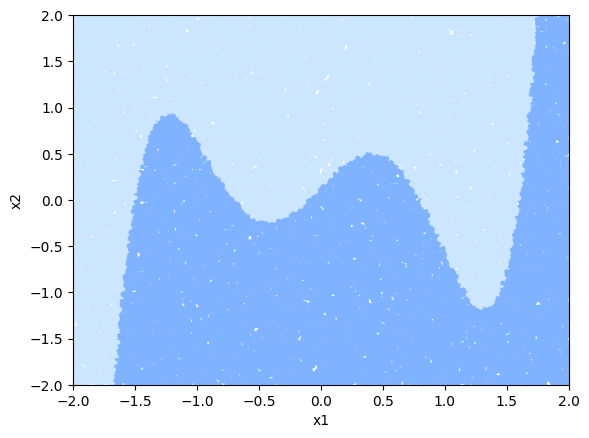

In [ ]:
blue_cmap = LinearSegmentedColormap.from_list('blue', [(0.5, 0.7, 1), (0.8, 0.9, 1)], N=2)
def set_plot_style():
  plt.axis([-2,2,-2,2])
  plt.xlabel('x1')
  plt.ylabel('x2')
set_plot_style()
plt.scatter(X[:,0],X[:,1], s=6, c=y, cmap=blue_cmap)

Instance of interest

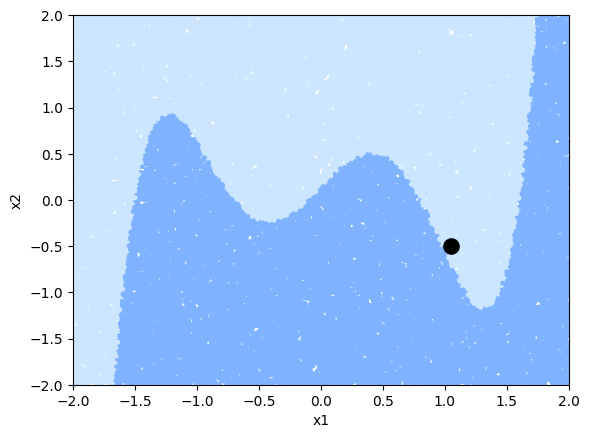

In [ ]:
Xi = np.array([1.05,-0.5])
set_plot_style()
plt.scatter(X[:,0],X[:,1], s=6, c=y, cmap=blue_cmap)
plt.scatter(Xi[0],Xi[1],c="black", marker="o",s=120 )

Local perspective - classification boundary now linear

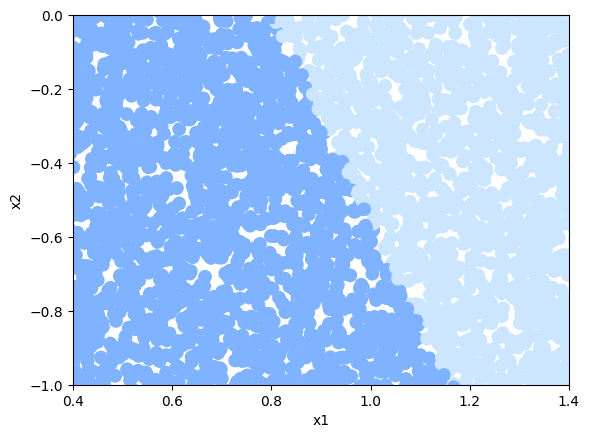

In [ ]:
def set_plot_style2():
  plt.axis([0.4,1.4,-1,-0])
  plt.xlabel('x1')
  plt.ylabel('x2')
set_plot_style2()
plt.scatter(X[:,0],X[:,1], s=80, c=y, cmap=blue_cmap)


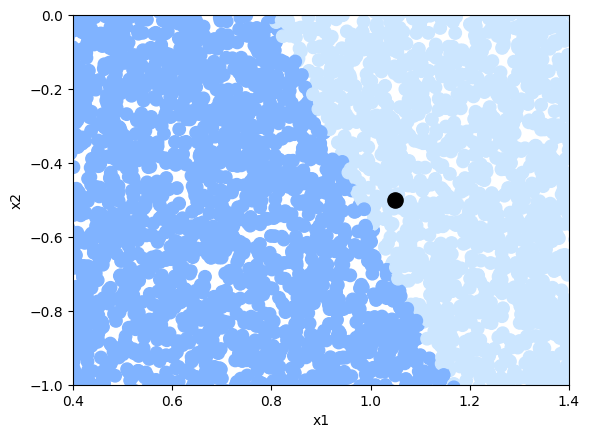

In [ ]:
Xi = np.array([1.05,-0.5])
set_plot_style2()
plt.scatter(X[:,0],X[:,1], s=80, c=y, cmap=blue_cmap)
plt.scatter(Xi[0],Xi[1],c="black", marker="o",s=120 )

# Apply Black Box Model

Learn Black Box model on sample dataset using Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X, y)

RandomForestClassifier()

Create a meshgrid as a new dataset to apply our learned model

In [ ]:
depth=0.00001
def make_meshgrid(x1, x2, h=.002,x1_min=0,x1_max=0,x2_min=0,x2_max=0):
    if x1_min==0 and x1_max==0 and x2_min==0 and x2_max==0:
        x1_min, x1_max = x1.min() - depth, x1.max() + depth
        x2_min, x2_max = x2.min() - depth, x2.max() + depth
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    return np.vstack((xx1.ravel(), xx2.ravel())).T

#Create mesh grid and predict class for each element in mesh grid
XX = make_meshgrid(X[:,0],X[:,1],h=.02)

Black Box Model: Predict the new dataset with the learned model

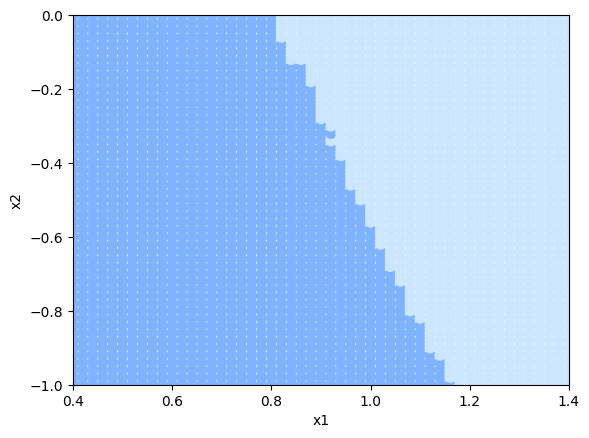

In [ ]:
yy = classifier.predict(XX)

set_plot_style2()
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)

# How to explain the Black Box Models predictions?

LIME: Local Interpretable Model-agnostic Explanations

Approximate Black Box Model on a single prediction

Lime is a local surrogate model. Mathematically, this can be expressed as

$$
\xi(x) = arg\:\underset{g \in G}{min}\:L(f,g,\pi_x) + \Omega(g)
$$

The explanation model for instance x is the model g (e.g. linear regression model) that minimizes loss L (e.g. mean squared error).  

$$
L(f,g,\pi_x)=\sum_{z,z'\in G}^{} {\pi_x(z)(f(z)-g(z'))^2}
$$
z = sample in neighborhood of x.<br>
L measures proximity of the explanation to the prediction of the original model f (e.g. Random Forrest). <br>
Ω(g) is the models complexity, which shall be kept low (e.g. prefer fewer features). <br>
G is a class of linear models $$g(z) = w_g*z',$$
for example Linear Regression, Lasso or Ridge.<br>
$π_x$ is a proximity measure that defines how large the neighborhood around instance x is. <br>

LIME only optimizes the loss part. The user has to determine the complexity, e.g. by selecting the maximum number of features that the linear regression model may use.

# Select instance of interest

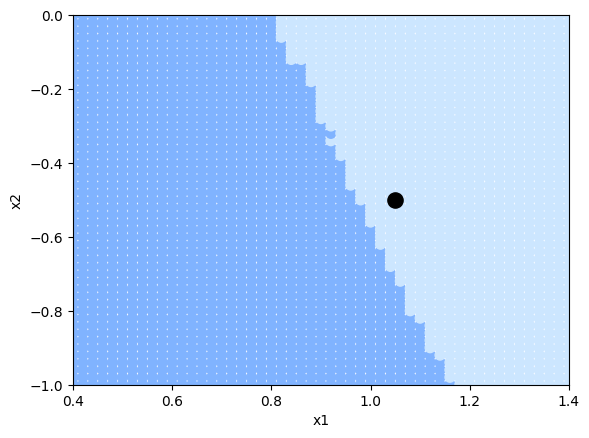

In [ ]:
Xi = np.array([1.05,-0.5])
set_plot_style2()
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)
plt.scatter(Xi[0],Xi[1],c="black", marker="o",s=120 )

#Pertubation

Pertubate random gaussian distributed points around instance of interest

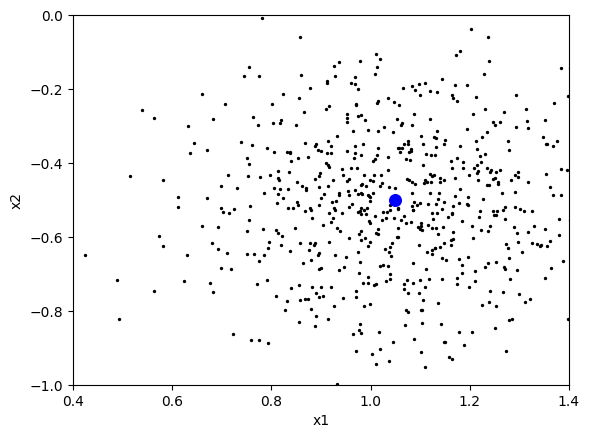

In [ ]:
np.random.seed(123)
num_perturb = 650
X_pertub = np.random.normal(0,0.2,size=(num_perturb,X.shape[1]))
X_lime = X_pertub + np.random.normal(0, 0.01, size=X_pertub.shape)
X_lime += Xi

set_plot_style2()
plt.scatter(X_lime[:,0],X_lime[:,1],s=2,c="black")
plt.scatter(Xi[0], Xi[1], c="blue", marker="o", s=70)

# Get Black Box predictions for new point

Predict classification of random points using our trained Black Box Model

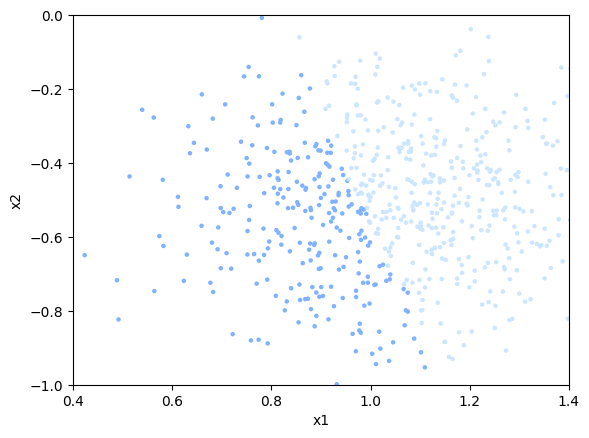

In [ ]:
y_lime = classifier.predict(X_lime)
set_plot_style2()
plt.scatter(X_lime[:,0],X_lime[:,1], s=5, c=y_lime, cmap=blue_cmap)

(Different colors for visibility purposes)

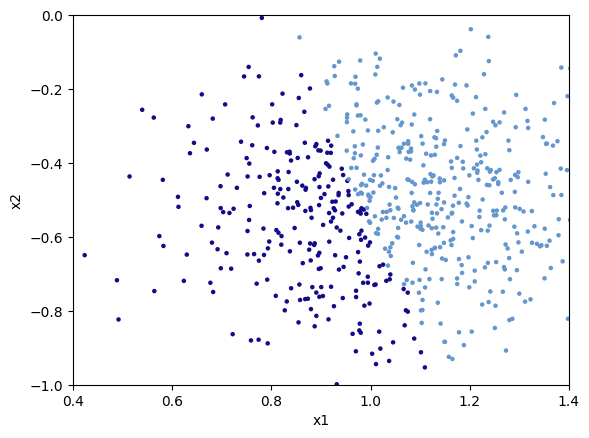

In [ ]:
cornflower_blue = (0.3922, 0.5882, 0.8157)
ultramarine_blue = (0.0745, 0.0431, 0.5294)

new_cmap = LinearSegmentedColormap.from_list('blue', [ultramarine_blue, cornflower_blue], N=2)

y_lime = classifier.predict(X_lime)
set_plot_style2()
plt.scatter(X_lime[:,0],X_lime[:,1], s=5, c=y_lime, cmap=new_cmap)

In [ ]:
classifier.predict(np.array([1.05,-0.5]).reshape(1, -1) )

array([1])

Instance of interest (big dot) and data sampled from a normal distribution (small dots)

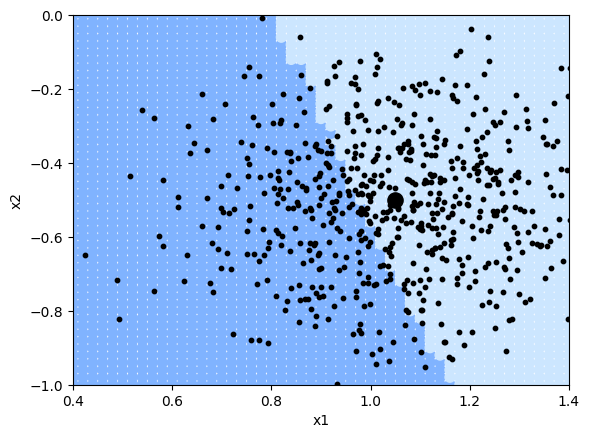

In [ ]:
set_plot_style2()
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)
plt.scatter(X_lime[:,0],X_lime[:,1],s=10,c= 'black')
plt.scatter(Xi[0],Xi[1],c="black",marker="o",s=120 )

#Weighting

Weight the pertubated data according to their distance to the instance of interest

Set the kernel width as

$$
\sigma = \sqrt{Features} * 0.75
$$


(For visualization purposes we use 0.02 in this example)

In [ ]:
kernel_width = np.sqrt(X_lime.shape[1]) * 0.02

Compute the Euclidean distance

$$
D(x,z) = \sum_{i=1}^{n} {(x - z_i)^2}
$$

In [ ]:
Distance = np.sum((Xi - X_lime)**2,axis=1)

Set the exponential weight function (Kernel function)

$$
\pi_x(z) = e^{(\frac{-D(x,z)^2}{\sigma^2})}
$$

In [ ]:
weights = np.sqrt(np.exp(-(Distance**2)/(kernel_width**2)))
weights.shape

(650,)

Figure plot of weighted data

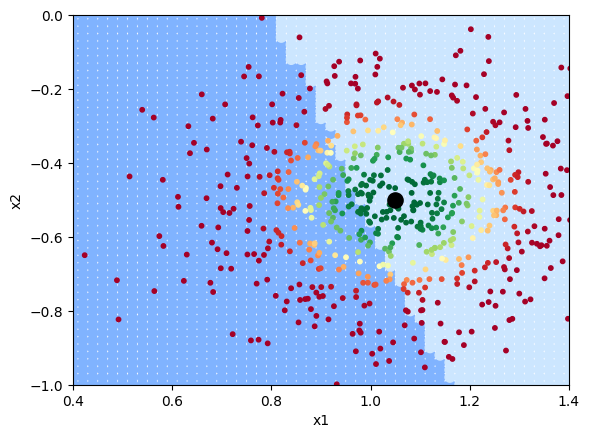

In [ ]:
set_plot_style2()
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)
plt.scatter(X_lime[:,0],X_lime[:,1],s=10,c= weights,cmap="RdYlGn")
plt.scatter(Xi[0],Xi[1],c="black",marker="o",s=120 )

#Approximation

Train a weighted, interpretable model on the dataset with the variations.
Fit the regression using weighted least squares around instance of interest

In [ ]:
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression()
simpler_model.fit(X_lime, y_lime, sample_weight=weights)

LinearRegression()

Predict our classification on our locally trained model

In [ ]:
y_linmodel = simpler_model.predict(X_lime)

Create a binary decision variable for locally trained model

In [ ]:
y_linmodel_binary = (y_linmodel < 0.5).astype(int)

Plot the local surrogate model with its decision boundary

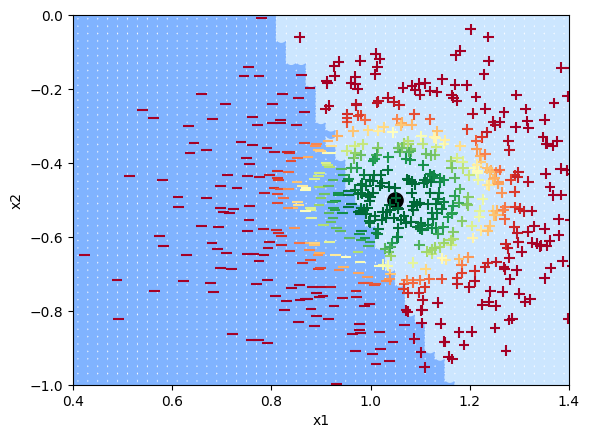

In [ ]:
set_plot_style2()
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)
plt.scatter(Xi[0],Xi[1],c="black",marker="o",s=120 )
plt.scatter(X_lime[y_linmodel_binary==0,0],X_lime[y_linmodel_binary==0,1],c= weights[y_linmodel_binary==0],cmap="RdYlGn",marker="+",s=60)
plt.scatter(X_lime[y_linmodel_binary==1,0],X_lime[y_linmodel_binary==1,1],c= weights[y_linmodel_binary==1],cmap="RdYlGn",marker="_",s=60)

Model coefficients

In [ ]:
simpler_model.coef_

array([3.10092658, 0.92829484])

In [ ]:
simpler_model.intercept_

-2.0517489067846286

Create decision boundary line (regression line) using

$$
x_2 = \frac{0.5-\alpha}{\beta_2} - \frac{\beta_1}{\beta_2}x_1
$$

In [ ]:
coefficients = simpler_model.coef_
intercept = simpler_model.intercept_

decision_boundary = (0.5-intercept-coefficients[0]*XX[:,0])/coefficients[1]

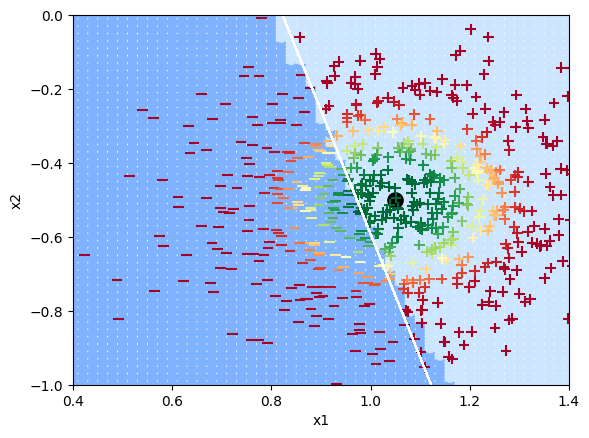

In [ ]:
set_plot_style2()
plt.plot(XX[:, 0], decision_boundary, color='white', linestyle='--', linewidth=1)
plt.scatter(XX[:,0],XX[:,1], s=50, c=yy, cmap=blue_cmap)
plt.scatter(Xi[0], Xi[1], c="black", marker="o", s=120)
plt.scatter(X_lime[y_linmodel_binary == 0, 0], X_lime[y_linmodel_binary == 0, 1], c=weights[y_linmodel_binary == 0], cmap="RdYlGn", marker="+", s=60)
plt.scatter(X_lime[y_linmodel_binary == 1, 0], X_lime[y_linmodel_binary == 1, 1], c=weights[y_linmodel_binary == 1], cmap="RdYlGn", marker="_", s=60)


Global perspective on local approximation

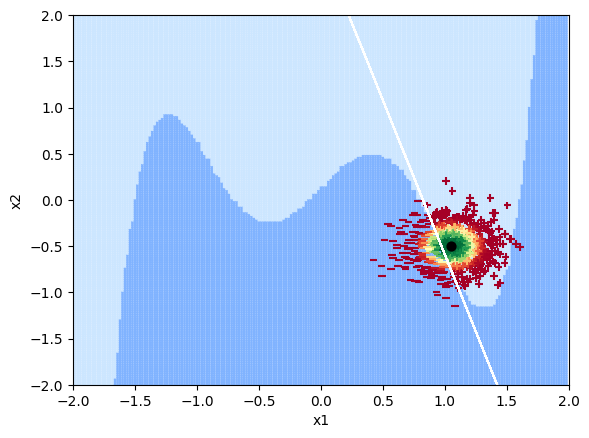

In [ ]:
plt.axis([-2,2,-2,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(XX[:,0],XX[:,1], s=1, c=yy, cmap=blue_cmap)
plt.plot(XX[:, 0], decision_boundary, color='white', linestyle='--', linewidth=1)
plt.scatter(X_lime[y_linmodel_binary==0,0],X_lime[y_linmodel_binary==0,1],c= weights[y_linmodel_binary==0],cmap="RdYlGn",marker="+",s=30)
plt.scatter(X_lime[y_linmodel_binary==1,0],X_lime[y_linmodel_binary==1,1],c= weights[y_linmodel_binary==1],cmap="RdYlGn",marker="_",s=30)
plt.scatter(Xi[0],Xi[1],c="black",marker="o",s=40 )

Add colorbar

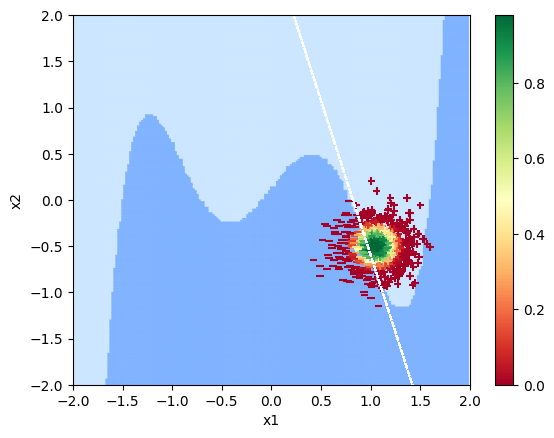

In [ ]:
plt.axis([-2,2,-2,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(XX[:,0],XX[:,1], s=1, c=yy, cmap=blue_cmap)
plt.plot(XX[:, 0], decision_boundary, color='white', linestyle='--', linewidth=1)
plt.plot(XX[:, 0], decision_boundary, color='white', linestyle='--', linewidth=1)
plt.scatter(X_lime[y_linmodel_binary==0,0],X_lime[y_linmodel_binary==0,1],c= weights[y_linmodel_binary==0],cmap="RdYlGn",marker="+",s=30)
plt.scatter(X_lime[y_linmodel_binary==1,0],X_lime[y_linmodel_binary==1,1],c= weights[y_linmodel_binary==1],cmap="RdYlGn",marker="_",s=30)
plt.colorbar()

Visualization of kernel width problem

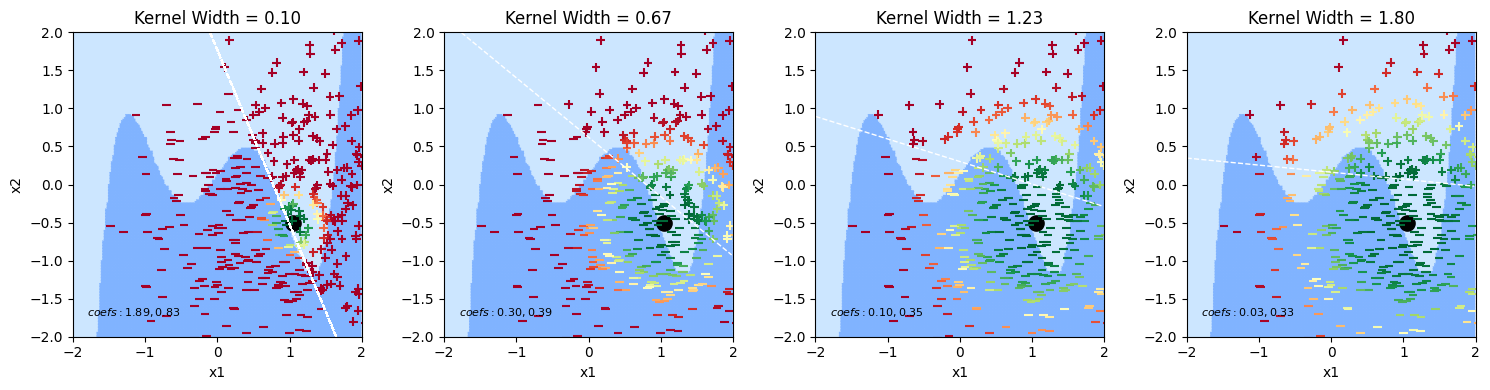

In [ ]:
num_perturb = 500
X_pertub = np.random.normal(0,1,size=(num_perturb,X.shape[1]))
X_lime = X_pertub + np.random.normal(0, 0.001, size=X_pertub.shape)
X_lime += Xi


y_lime = classifier.predict(X_lime)

classifier.predict(np.array([1.05,-0.5]).reshape(1, -1) )

num_subplots = 4

def set_plot_style(ax):
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')


fig, axes = plt.subplots(1, num_subplots, figsize=(15, 4))

# Loop through different kernel widths
for i in range(num_subplots):
    kernel_width = np.sqrt(X_lime.shape[1]) * (0.1/np.sqrt(2) + i * 0.4)  # Adjust the range of kernel widths

    # Calculate weights
    Distance = np.sum((Xi - X_lime) ** 2, axis=1)
    weights = np.sqrt(np.exp(-(Distance ** 2) / (kernel_width ** 2)))

    # Fit the model with sample weights
    simpler_model = LinearRegression()
    simpler_model.fit(X_lime, y_lime, sample_weight=weights)

    # Coefficients
    coefficients = simpler_model.coef_
    intercept = simpler_model.intercept_

    # Decision boundary
    decision_boundary = (0.5-intercept-coefficients[0]*XX[:,0])/coefficients[1]

    # Predict and create binary labels
    y_linmodel = simpler_model.predict(X_lime)
    y_linmodel_binary = (y_linmodel < 0.5).astype(int)

    # Plot on the corresponding subplot
    set_plot_style(axes[i])  # Pass the current axis to set_plot_style
    axes[i].plot(XX[:, 0], decision_boundary, color='white', linestyle='--', linewidth=1)
    axes[i].scatter(XX[:, 0], XX[:, 1], s=0.5, c=yy, cmap=blue_cmap)
    axes[i].scatter(Xi[0], Xi[1], c="black", marker="o", s=120)
    axes[i].scatter(X_lime[y_linmodel_binary == 0, 0], X_lime[y_linmodel_binary == 0, 1], c=weights[y_linmodel_binary == 0], cmap="RdYlGn", marker="+", s=40)
    axes[i].scatter(X_lime[y_linmodel_binary == 1, 0], X_lime[y_linmodel_binary == 1, 1], c=weights[y_linmodel_binary == 1], cmap="RdYlGn", marker="_", s=40)

    # Display coefficients for each class
    coeff_str_0 = f'$coefs: {coefficients[0]:.2f}, {coefficients[1]:.2f}$'
    axes[i].text(-1.8, -1.6, coeff_str_0, color='black', fontsize=8, verticalalignment='top')
    axes[i].set_title(f'Kernel Width = {kernel_width:.2f}')
plt.tight_layout()
plt.show()
